<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dset
import torchvision.transforms as transform

from torch.utils.data import DataLoader
import torch.nn.init 

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
device

'cuda'

In [0]:
#이미지를 텐서로 변환해주는건 필수...

trans=transform.Compose(
[transform.ToTensor(),
transform.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])

])

In [5]:
cifar10_train=dset.CIFAR10(root='CIFAR10/',train=True,download=True,transform=trans)
cifar10_test=dset.CIFAR10(root='CIFAR10/',train=False,download=True,transform=trans)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
import os
os.listdir('CIFAR10/cifar-10-batches-py')

['readme.html',
 'data_batch_2',
 'data_batch_1',
 'batches.meta',
 'data_batch_3',
 'test_batch',
 'data_batch_5',
 'data_batch_4']

In [0]:
train_loader=DataLoader(dataset=cifar10_train,batch_size=64,shuffle=True,drop_last=True)
test_loader=DataLoader(dataset=cifar10_test,batch_size=64,shuffle=False)

#train 50000, test10000

In [0]:
images,labels = next(iter(train_loader))

In [9]:
images.shape, labels.shape  #이미지의 shape 한번 확인  배치사이즈*채널*height*width

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [10]:
images[0].shape

torch.Size([3, 32, 32])

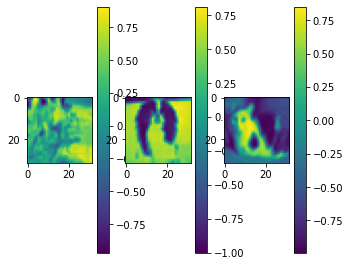

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5,10))

plt.subplot(131)
plt.imshow(images[10][0,:,:])
plt.colorbar()

plt.subplot(132)
plt.imshow(images[20][0,:,:])
plt.colorbar()


plt.subplot(133)
plt.imshow(images[30][0,:,:])
plt.colorbar()


plt.show()

In [0]:
class cifar10(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = torch.nn.Linear(2 * 2 *256, 10, bias=True)
        torch.nn.init.kaiming_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)  
        out = self.fc(out)
        return out

In [0]:
model=cifar10().to(device)

In [0]:
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [15]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 781


In [17]:
for epoch in range(10):
    avg_cost = 0

    for images, labels in train_loader:
        images=images.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        hypothesis = model(images)
        cost = criterion(hypothesis, labels)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.464411259
[Epoch:    2] cost = 0.358598977
[Epoch:    3] cost = 0.270746857
[Epoch:    4] cost = 0.206572518
[Epoch:    5] cost = 0.160603225
[Epoch:    6] cost = 0.136534333
[Epoch:    7] cost = 0.115571477
[Epoch:    8] cost = 0.108451635
[Epoch:    9] cost = 0.095933333
[Epoch:   10] cost = 0.0998963192


In [18]:
with torch.no_grad():
    correct=0
    total=0
    
    for images, labels in train_loader:
        images=images.to(device)
        labels=labels.to(device)

        prediction=model(images)
        _,argmax= torch.max(prediction,1)
        total += images.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 49984 images: 97.76%
